# 7.1 Creating charts
** **
## Table of contents:

1. Importing libraries <br>
2. Importing dataframe <br>
3. Creating charts
    - 3.1 Bar chart
    - 3.2 Histogram
    - 3.3 Scatterplot
        - 3.3.1 Identifying and addressing the issue in "prices" column
        - 3.3.2 Back to histogram
    - 3.4 Line chart
        - 3.4.1 Sampling
        - 3.4.2 Creating the line chart
** **

# 1. Importing libraries
** **

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing dataframe
** **

In [2]:
# Creating a path variabile for the folder
path = r'C:\Users\Simone\Desktop\Career Foundry\Esercizi modulo 5\Instacart basket analysis'

In [3]:
# Importing dataframe from Prepared Data
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_merged_derived_flags.pkl'))

In [4]:
# Checking the head
df_ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer


# 3. Creating charts
** **

## 3.1 Bar charts

A bar chart can be used to visualize the count of values in a specific column.

<AxesSubplot:>

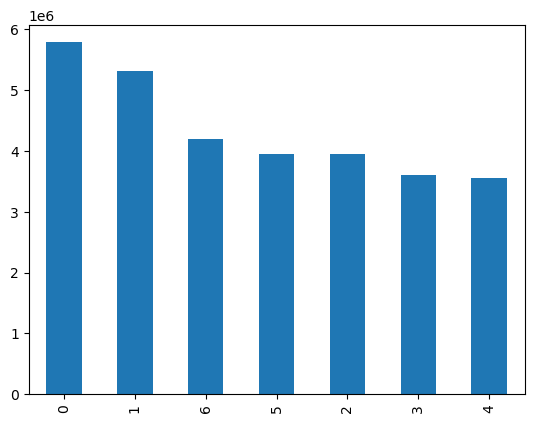

In [5]:
# Creating a bar chart
df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

The default option will sort the values in a descendant way, but is possible to sort them according to index as well.

<AxesSubplot:>

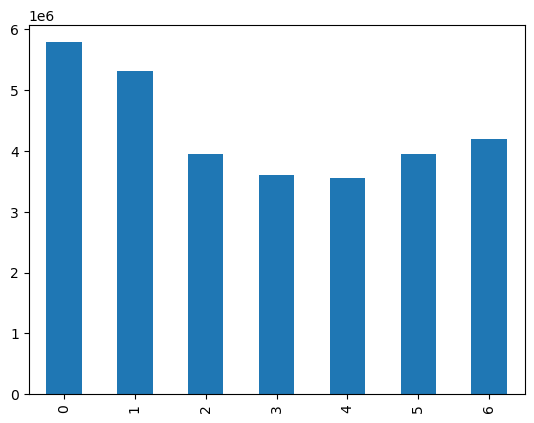

In [6]:
# Creating a new bar chart sorted on index
df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

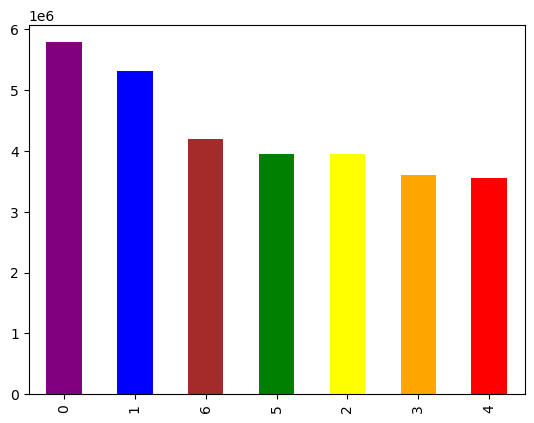

In [7]:
# Adding colors
df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'blue', 'brown', 'green', 'yellow', 'orange', 'red'])

Charts can be also stored in an object and then exported (saved as png).

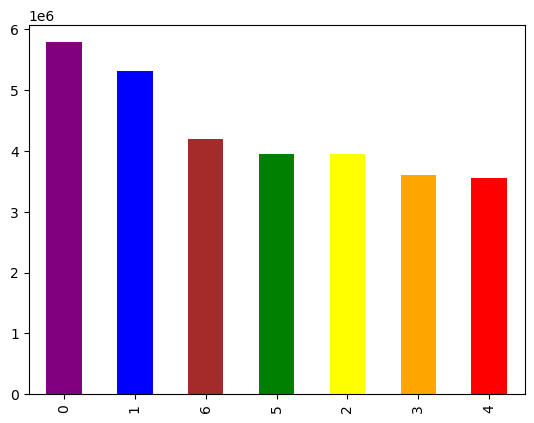

In [8]:
# Creating a bar object
bar = df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'blue', 'brown', 'green', 'yellow', 'orange', 'red'])

In [9]:
# Exporting the file as png
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'bar_orders_dow.png'))

## 3.2 Histograms

Histograms can be used to visualize the frequency of continuous variables.

<AxesSubplot:ylabel='Frequency'>

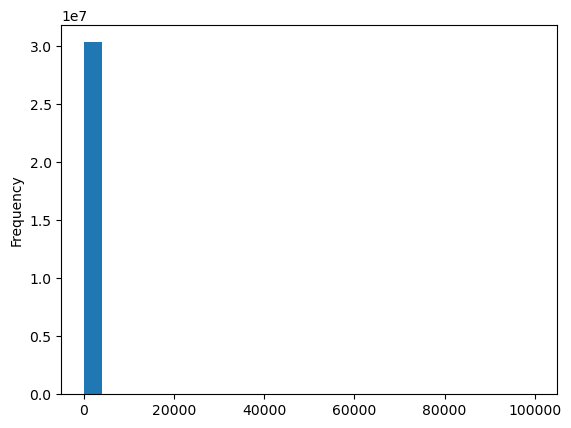

In [10]:
# Creating an histogram for the prices column
df_ords_prods_merged['prices'].plot.hist(bins = 25)

The histogram is broken due to abnormal high values in the prices column. <br>
We will investigate the issue through a scatterplot.

## 3.3 Scatterplots

A scatterplot can be used to cross two variables or even the same variable with itself.

<AxesSubplot:xlabel='prices', ylabel='prices'>

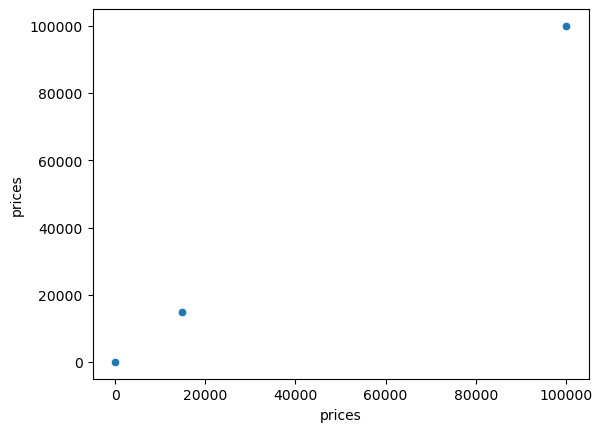

In [11]:
# Creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merged)

<b> Observations: </b> <br>
There are two values way beyond the mean of the prices column (that is 12). We need to identify these values.

### 3.3.1 Identifying and addressing the issue in "prices" column

In [12]:
# Checking the items that costs more than 100$
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
8960343,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,109.67,High spender,5.0,Frequent customer
8960344,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,109.67,High spender,5.0,Frequent customer
8960345,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1250.25,High spender,12.0,Regular customer
8960346,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest day,Average orders,4,New customer,1250.25,High spender,12.0,Regular customer
8960347,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest day,Average orders,16,Regular customer,120.09,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27128304,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest day,Average orders,39,Regular customer,1137.80,High spender,4.0,Frequent customer
27128305,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest day,Most orders,39,Regular customer,1137.80,High spender,4.0,Frequent customer
27128306,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy,Most orders,15,Regular customer,487.08,High spender,5.0,Frequent customer
27128307,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy,Average orders,12,Regular customer,1235.68,High spender,12.0,Regular customer


<b> Observations: </b> <br>
4776 rows contains outliers. Two items costs 14.900 and 99.999 $.

In [13]:
# Assigning missing values to these outliers
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [14]:
# Checking if there are any other outliers
df_ords_prods_merged['prices'].max()

25.0

Max value is now 25. We have successfully changed the value of the outliers to "NaN".

### 3.3.2 Back to histogram

<AxesSubplot:ylabel='Frequency'>

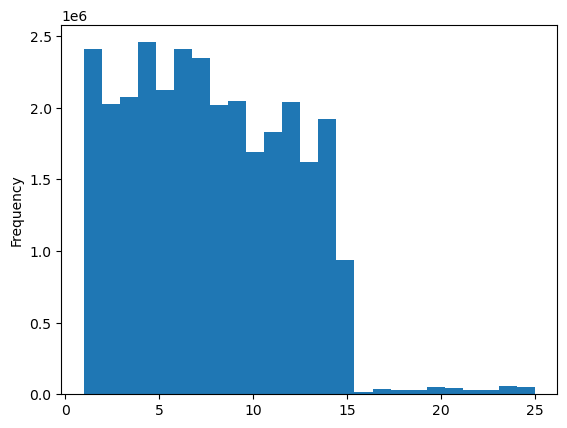

In [15]:
# Creating a new histogram
df_ords_prods_merged['prices'].plot.hist(bins = 25)

Price of most of the products is between 1 and 15 dollars.

<AxesSubplot:ylabel='Frequency'>

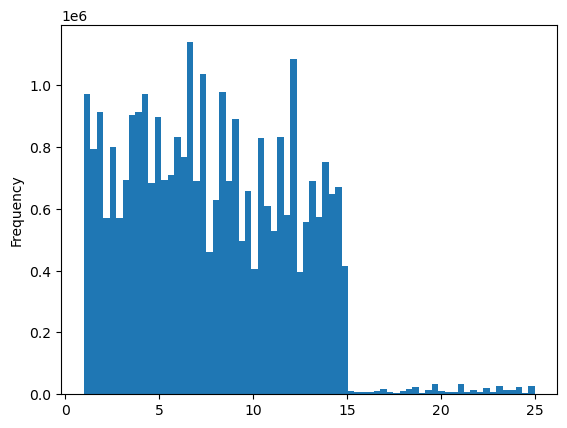

In [16]:
# Trying an histogram with more bins
df_ords_prods_merged['prices'].plot.hist(bins = 70)

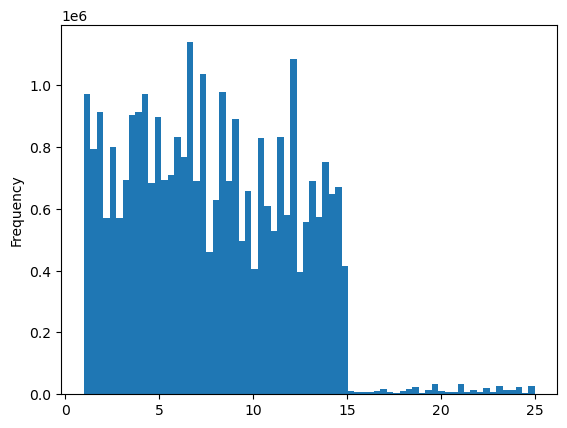

In [17]:
# Creating an histogram object
hist = df_ords_prods_merged['prices'].plot.hist(bins = 70)

In [18]:
# Exporting the file as png
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'histogram_prices.png'))

# 3.4 Line chart

In this section we are going to create a line chart for the prices during different days of the weeks. <br>
Since the prices column is continuous and contains a lot of value, is better to create a subset that contains only a part of the total dataframe. <br>
Creating representative sample as a subset, it will involve some randomization.

### 3.4.1 Sampling

In [19]:
# Creating a sample as a subset
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [20]:
# Testing the dev list created
dev

array([False,  True, False, ...,  True, False,  True])

In [21]:
# Testing np.random.rand function (only 10 numbers, not the entire len of dataframe)
np.random.rand(10)

array([0.38249654, 0.86075523, 0.52050071, 0.76980339, 0.95770057,
       0.65565091, 0.77542577, 0.2051172 , 0.66590939, 0.42935793])

In [22]:
# Creating a dataframe with 70% of rows of the original dataframe
big = df_ords_prods_merged[dev]

In [23]:
# Creating a dataframe with 30% of rows of the original dataframe
small = df_ords_prods_merged[~dev]

In [24]:
# Checking if the original dataframe and the two samples have the same length
len(df_ords_prods_merged)

30328763

In [25]:
len(big) + len(small)

30328763

In [26]:
# Creating a new dataframe containing only the two columns needed for the chart
df_2 = small[['orders_day_of_week','prices']]

### 3.4.2 Creating the line chart

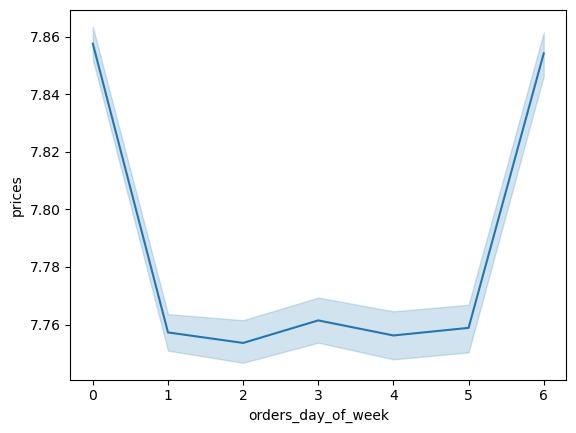

In [27]:
# Creating a linechart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [28]:
# Exporting the line chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_prices.png'))